In [24]:
import pandas as pd
import numpy as np
import umap
from sentence_transformers import SentenceTransformer
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("https://github.com/cohere-ai/notebooks/raw/main/notebooks/data/hello-world-kw.csv", names=["search_term"])
df.head()

,search_term
0,how to print hello world in python
1,what is hello world
2,how do you write hello world in an alert box
3,how to print hello world in java
4,how to write hello world in eclipse


In [3]:
model = SentenceTransformer(model_name_or_path='sentence-transformers/all-MiniLM-L6-v2')

In [4]:
search_terms = df['search_term'].values.tolist()

In [5]:
df['embeddings'] = [model.encode(term) for term in search_terms]

In [43]:
reducer =umap.UMAP(n_neighbors=25)

In [44]:
umap_embeds = reducer.fit_transform(df['embeddings'].values.tolist())

In [45]:
df['x'] = umap_embeds[:,0]
df['y'] = umap_embeds[:,1]

<Axes: xlabel='x', ylabel='y'>

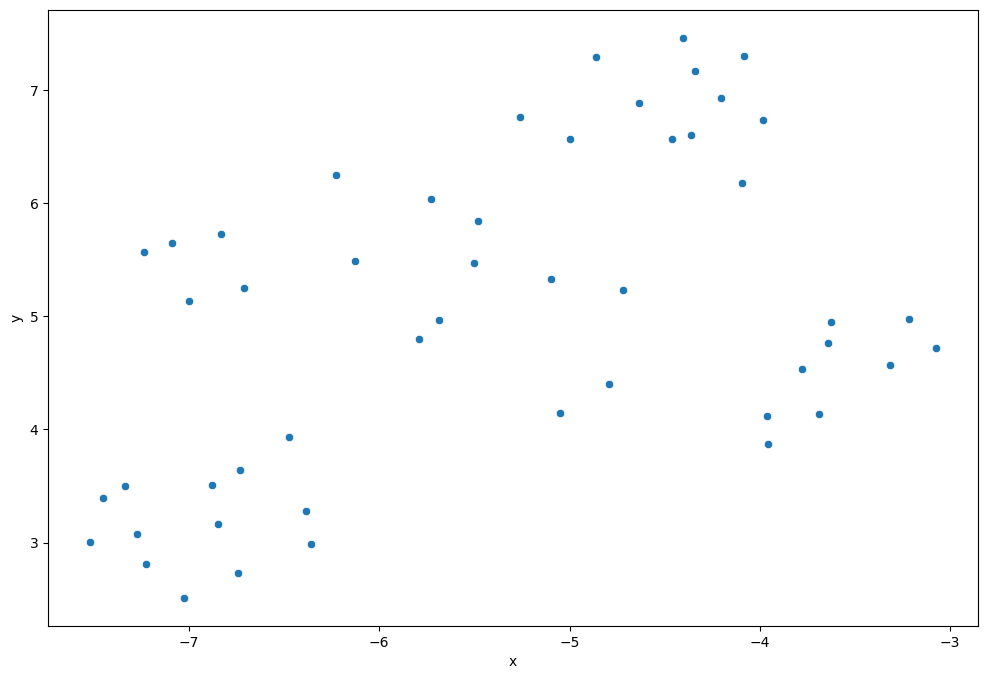

In [46]:
fig = plt.figure(figsize=(12,8))
sc.scatterplot(x=df['x'], y=df['y'], )

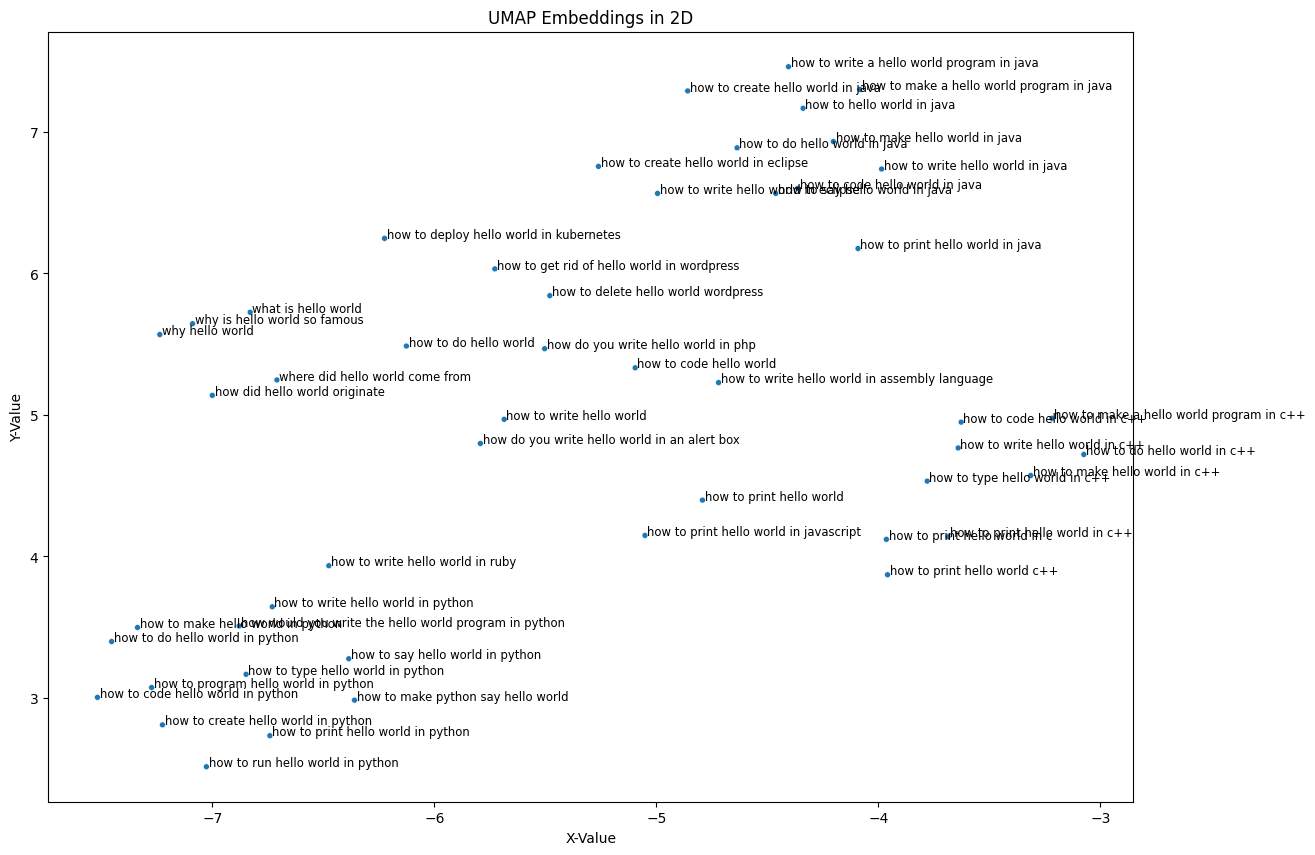

Bad pipe message: %s [b'lc\x85\xd2\xcf\xcd\xfeKW|E\x81\x81\xd8\xc8?\x91\x12 \xda#\xc9\xa7\xf3\xa8\xf6\xb4p*\xf8#|\xe7^\xae\x1b\x81\x91}\xe1\x99up\xba\xdf\xd4\xd0\xb4T\xe0\x08\x00\x08\x13\x02\x13\x03\x13\x01\x00\xff\x01\x00\x00\x8f\x00\x00\x00\x0e\x00\x0c\x00\x00\t127.0.0.1\x00\x0b\x00\x04\x03\x00\x01\x02\x00\n\x00\x0c\x00\n\x00\x1d\x00', b'\x1e\x00\x19\x00\x18\x00#\x00\x00\x00\x16\x00\x00\x00\x17\x00\x00\x00\r\x00\x1e\x00']
Bad pipe message: %s [b'\x03\x05\x03\x06\x03\x08\x07\x08\x08\x08\t\x08\n\x08\x0b\x08\x04\x08\x05\x08\x06\x04\x01\x05\x01\x06\x01']
Bad pipe message: %s [b"\x06\xa9H>\xa8\xad&\xcd\xaf\xadR\xdb\xca\xfc'\x1eTj\x00\x00|\xc0,\xc00\x00\xa3\x00\x9f\xcc\xa9\xcc\xa8\xcc\xaa\xc0\xaf\xc0\xad\xc0\xa3\xc0\x9f\xc0]\xc0a\xc0W\xc0S\xc0+\xc0/\x00\xa2\x00\x9e\xc0\xae\xc0\xac\xc0\xa2\xc0\x9e\xc0\\\xc0`\xc0V\xc0R\xc0$\xc0(\x00k\x00j\xc0#\xc0'\x00g\x00@\xc0\n\xc0"]
Bad pipe message: %s [b'9\x008\xc0\t\xc0\x13\x003\x002\x00\x9d\xc0\xa1\xc0\x9d\xc0Q']
Bad pipe message: %s [b'\xf0\xeb\xf8m

In [49]:

plt.figure(figsize=(14,10))
p1 = sns.scatterplot(x='x', # Horizontal axis
       y='y', # Vertical axis
       data=df, # Data source
       size=20,
       legend=False)  

for line in range(0,df.shape[0]):
     p1.text(df.x[line]+0.01, df.y[line], 
     df.search_term[line], horizontalalignment='left', 
     size='small', color='black')

title = plt.title('UMAP Embeddings in 2D')
# Set x-axis label
xlabel = plt.xlabel('X-Value')
# Set y-axis label
ylabel = plt.ylabel('Y-Value')